# Credit EDA Case Study 
### UMASHANKAR SOMASEKAR 
### SAKSHAM KAPUR 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Step 1: Importing Data and Understanding

In [2]:
#newapp - New Application Data 
#prevapp - Previous Application Data 

newapp = pd.read_csv(r'C:\Users\Preeti kapur\OneDrive\Desktop\Case Study\application_data.csv')
prevapp = pd.read_csv(r'C:\Users\Preeti kapur\OneDrive\Desktop\Case Study\previous_application.csv')

In [3]:
#There are 122 columns, Want to see all the columns 
pd.set_option('display.max_columns', 400) # to display all columns 
pd.set_option('display.max_rows', 400) # to view all rows 

### Inspecting the New_application newapp Dataset

In [4]:
newapp.shape

(307511, 122)

In [5]:
newapp.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [6]:
newapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#There are 122 Columns in the Let's perform a Describe on the dataset. 
newapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
# Some irregularities can be seen: Directly, Such as DAYS_BIRTH and other similar columns have Negative values,
#But Before we fix that let's check for the NUll VALUES in the COLUMNS. 

null_perc = round(newapp.isnull().mean()*100,2).sort_values(ascending = False)
null_perc

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### Cleaning the newapp dataset. Removing, Imputing values. 

In [9]:
# Let's Check for all the columns which have more than 40% data missing. 
high_null_col = null_perc[newapp.isnull().mean() >= 0.4]
high_null_col

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
#I believe we can drop these columns for our Analysis as they contain more than 40% data missing. 
newapp = newapp.loc[:,newapp.isnull().mean() <= 0.4]
newapp.shape

(307511, 73)

In [11]:
# The new column count is not 73, compared to 122 earlier. 
#We can do a null check count on the rows also to see if there high number of NaN values. 
(newapp.isnull().mean(axis=1)*100).sort_values(ascending = False)
# There are not many NaN values, atleast not crossing the 40% mark.

50536     16.438356
166882    16.438356
92687     16.438356
54457     16.438356
28438     16.438356
            ...    
132399     0.000000
132401     0.000000
132402     0.000000
132403     0.000000
307510     0.000000
Length: 307511, dtype: float64

In [12]:
#Now Checkking all the columns with Less than 15% missing values. 
null_perc[(null_perc <= 15) & (null_perc > 0)].sort_values(ascending = False)

AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
NAME_TYPE_SUITE                0.42
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

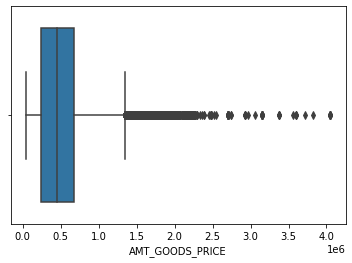

In [13]:
#Checking all the columns Individually
# 1) Checking AMT_GOODS_PRICE
sns.boxplot(x = 'AMT_GOODS_PRICE', data = newapp)
plt.show()

In [14]:
newapp.AMT_GOODS_PRICE.median()

450000.0

#### As the data seems continuous, we can impute the Data with it's Median Value. Which is 450000.0

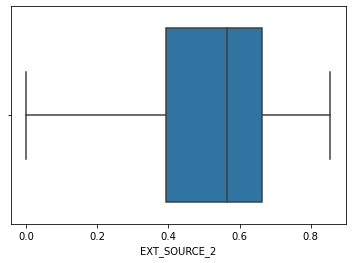

In [15]:
#2) Checking EXT_SOURCE_2
sns.boxplot(x ='EXT_SOURCE_2', data = newapp)
plt.show()

In [16]:
newapp.EXT_SOURCE_2.mean()

0.5143926741308463

#### As the data is well centred and has no outliers, We can safely the Impute the missing values with the Mean, which is 0.5143926741308463

In [17]:
#Checking DEF_60_CNT_SOCIAL_CIRCLE 
newapp.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

#The Data seems to be Categorical hence we can impute the Values with the MODE. Which is 0. 

0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [18]:
#Checking DEF_30_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE
#They are similar to the data above and seem categorical in nature, hence Imputing there values also with the MODE. Which is 0 in all cases. 
newapp.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
26.0          1
28.0          1
344.0         1
47.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [19]:
# Checking NAME_TYPE_SUITE Column
newapp.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### As we can see NAME_TYPE_SUITE is a categorical column, we can safely impute the missing Values with the MODE which is Unaccompanied.

In [20]:
#Checking AMT_REQ_CREDIT_BUREAU_HOUR ,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR 

#As the data type is float, let's check if the data is numerical or not. 
newapp[[ 'AMT_REQ_CREDIT_BUREAU_HOUR' ,'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

#It is numerical. I will see if the data is Categorical by an chance or not. 

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#AMT_REQ_CREDIT_BUREAU_HOUR ,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR 

#newapp.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts() :- Has only 4 Values
#newapp.AMT_REQ_CREDIT_BUREAU_DAY.value_counts() :- Has 9 Values Only.
#newapp. AMT_REQ_CREDIT_BUREAU_WEEK.value_counts() :- Has only 9 Values Only
newapp.AMT_REQ_CREDIT_BUREAU_MON.value_counts() #:- Has 24 Unique Values only.

#It looks like all of this Data is Categorical and we can SAFELY IMPUTE this DATA WITH THE MODE. 
#As they give a sense of Day, Hour, Month, etc we can concolude that this data is Categorical. And for All the Variable
#THE MODE IS ZERO '0', we can safely impute the values with '0'.

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [22]:
newapp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Now that we have taken care of most of the Values, Let's Further Clean the data and Drop More columns by correlating to their description. 

In [23]:
newapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Let's Create a list of all columsn that we want to drop and then let's drop by calling the Drop() method. 
#columns for dropping = cols_drop
cols_drop = ['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
            'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
            'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
            'FLAG_DOCUMENT_21']
len(cols_drop)

31

In [25]:
#Let's Drop these columns for now and then see how we will proceed with it. 
newapp.drop(columns = cols_drop, inplace = True)

In [26]:
newapp.shape

(307511, 42)

In [27]:
newapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

#### Let us now check for the data types and data values. 

In [28]:
#As we saw in the Cleaning Earlier, A lot of Columns seemed Categorical, but I will check if it is the case or not with all the
#columns or not, So, in case they are categorical, I might want to change their data type or Categorical, Str, object...etc. 
#I need to perform the Value_counts on all the variables, but I do not wish to do this, indivdually, so I found a method nunique()

newapp.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

#### I am certain that Occupation Type Data is Categorical, and Let's say that everything till Occupation type is Categorical so let us just get all the names in a list till occupation type. 

In [29]:
newapp.nunique().sort_values().index

Index(['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOUR

In [30]:
#Let's Typecast the data to Appropriate Data TYPES: https://pbpython.com/pandas_dtypes.html As CATEGORY
#Creating a list from the above list and Running a for loop: 
cat_cols = ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE']
for i in cat_cols: 
    newapp[i] = newapp[i].astype('category')

    

In [31]:
newapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [32]:
#Now As discussed earlier, there are some negative values in the DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION,
# DAYS_ID_PUBLISH Checking them 
newapp[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


In [33]:
#Let's run the abs() and convert them to all Positive Values. 
cols_days = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']

newapp[cols_days] = newapp[cols_days].abs()

In [34]:
newapp[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH']]
#Converted to Positive. 

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458
...,...,...,...,...
307506,9327,236,8456.0,1982
307507,20775,365243,4388.0,4090
307508,14966,7921,6737.0,5150
307509,11961,4786,2562.0,931


In [35]:
#Also, SK_ID_CURR is a fixed variable, So it should be immutable, Lets' convert it to Object, makes it easier and not worry
#about accidentally transforming it. 

newapp['SK_ID_CURR'] = newapp['SK_ID_CURR'].astype('object')
newapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_TYPE_SUITE             306219 non-null  category
 12  NAME_INCOME_TYPE            307511 non-null  category
 13 

In [36]:
#Now Let's See what else can we do! 
newapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#The Days columns can be converted to year columns, That will help us identify the age brackets better, and also other parameters
#We Will use cols_days

newapp[cols_days] = newapp[cols_days]/365
newapp[cols_days]

#The Data is now more comprehensible. 

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,25.920548,1.745205,9.994521,5.808219
1,45.931507,3.254795,3.249315,0.797260
2,52.180822,0.616438,11.671233,6.934247
3,52.068493,8.326027,26.939726,6.676712
4,54.608219,8.323288,11.810959,9.473973
...,...,...,...,...
307506,25.553425,0.646575,23.167123,5.430137
307507,56.917808,1000.665753,12.021918,11.205479
307508,41.002740,21.701370,18.457534,14.109589
307509,32.769863,13.112329,7.019178,2.550685


In [38]:
#Let's Explore More variables. 
newapp.CODE_GENDER.value_counts()
#THERE ARE 4 entries with 'XNA' how about we impute these values with the MODE as the data is Categorical. 


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
newapp.loc[newapp.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
newapp.CODE_GENDER.value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

In [40]:
newapp.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Let us Change the Column Names of DAYS_BIRTH etc to YEAR_BIRTH etc.
newapp.rename(columns = {'DAYS_BIRTH':'YEARS_BIRTH', 'DAYS_EMPLOYED':'YEARS_EMPLOYED',
                      'DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace = True)

In [42]:
newapp.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#Let's Explore the Income Column and Also the Credit Column
newapp[['AMT_INCOME_TOTAL', 'AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,5.990260e+05
std,2.371231e+05,4.024908e+05
min,2.565000e+04,4.500000e+04
25%,1.125000e+05,2.700000e+05
50%,1.471500e+05,5.135310e+05
75%,2.025000e+05,8.086500e+05
max,1.170000e+08,4.050000e+06


In [44]:
#The Values are too big and it is hard to ascertain the Customer Types, Let's Bin Them into Values for Both Income and Credit
#We can downscale it to Lakhs, by dividing the Columns by 100000 or we can just go with it.
#Let's See What works best. 

bins = [0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,150000000]

ranges =['0-500000','500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000',
        '2500000-3000000','3000000-3500000','3500000-4000000','4000000-4500000','4500000-5000000','5000000 +']
newapp['INCOME_RANGE'] = pd.cut(newapp['AMT_INCOME_TOTAL'], bins,labels =ranges)


In [45]:
newapp.INCOME_RANGE.value_counts()

0-500000           304809
500000-1000000       2452
1000000-1500000       166
1500000-2000000        40
2000000-2500000        25
5000000 +               5
3000000-3500000         4
3500000-4000000         4
4000000-4500000         4
2500000-3000000         2
4500000-5000000         0
Name: INCOME_RANGE, dtype: int64

In [46]:
# I will create  an Income class Also. 

def incclass(X):
    if X < 300000: 
        return 'Low'
    elif X >= 300000 and X < 3000000:
        return 'Average'
    else:
        return 'High'
    


In [47]:
newapp['INCOME_CLASS'] = newapp.AMT_INCOME_TOTAL.apply(incclass)

In [48]:
newapp.INCOME_CLASS.value_counts()

Low        284772
Average     22722
High           17
Name: INCOME_CLASS, dtype: int64

In [49]:
newapp.YEARS_BIRTH.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64

In [50]:
#Creating Age Groups Young, Middle, Seniors

def agegroup(X): 
    if X < 30: 
        return 'Young'
    elif X >= 30 and X < 50:
        return 'Middle'
    else:
        return 'Seniors'

In [51]:
newapp['AGE_GROUP'] = newapp.YEARS_BIRTH.apply(agegroup)

In [52]:
newapp.AGE_GROUP.value_counts()

Middle     158842
Seniors    103669
Young       45000
Name: AGE_GROUP, dtype: int64

#### Now, We have done the majority of Data Cleaning, And Imputation Now, Let's Start Checking for Outliers, 

## So, let's Start with Univariate Analysis

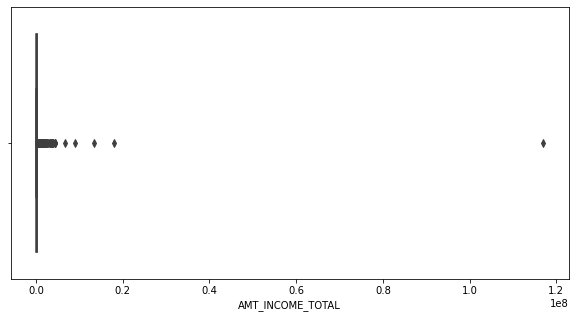

" The Income variable indicated the total income of the applicant and also, There seems to be an outlier, Let's check for that "

In [53]:
#1) BOX_PLOT for AMT_INCOME 
plt.figure(figsize = [10,5])
sns.boxplot(newapp.AMT_INCOME_TOTAL)
plt.show()

''' The Income variable indicated the total income of the applicant and also, There seems to be an outlier, Let's check for that '''

In [54]:
''' The Value has occupation type as Laborers and also the TARGET variable has 1 which means that the Client defaulted, hence
we can safely say that this is an outlier'''
newapp[newapp.AMT_INCOME_TOTAL == newapp.AMT_INCOME_TOTAL.max()]



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,34.561644,2.526027,18.526027,9.980822,1,Laborers,3.0,TUESDAY,14,0,0,0,Business Entity Type 3,0.113161,0.145543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000000 +,High,Middle


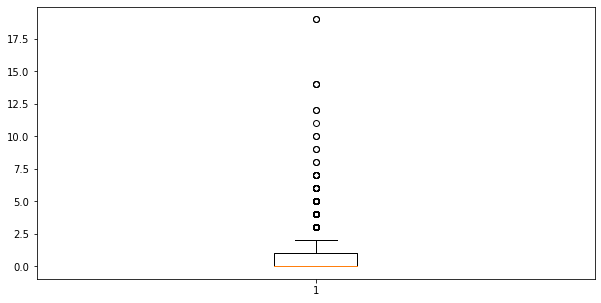

'There is an outlier here, also, 19 Children which seems a little far fetched hence an outlier.'

In [55]:
#2) BOX PLOT FOR 'CNT_CHILDREN'
plt.figure(figsize = [10,5])
plt.boxplot(newapp.CNT_CHILDREN)
plt.show()

'''There is an outlier here, also, 19 Children which seems a little far fetched hence an outlier.'''

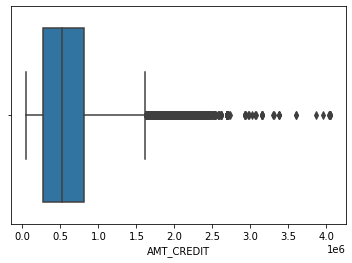

'It seems like there are some outliers in the data, so let us look at the data above 3.0 1e6'

In [56]:
#3) AMOUNT_CREDIT Boxplot 
sns.boxplot(newapp.AMT_CREDIT)
plt.show()

'''It seems like there are some outliers in the data, so let us look at the data above 3.0 1e6'''

In [57]:
'''In all the cases below the AMT_CREDIT is Greater than the AMT_INCOME_TOTAL, It is coherent with the concept of lending.'''
newapp[newapp.AMT_CREDIT > 3.0*1e6]
#Almost all of them are Cash Loans 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,3825000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.030755,52.495890,2.709589,2.301370,7.342466,1,Managers,4.0,MONDAY,15,0,0,0,Business Entity Type 3,0.777754,0.654529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500000-1000000,Average,Seniors
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,Office apartment,0.072508,35.057534,3.758904,9.742466,12.728767,1,Managers,3.0,WEDNESDAY,14,0,0,0,Trade: type 7,0.639547,0.805020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1000000,Average,Middle
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,41.578082,0.550685,4.189041,12.936986,1,Managers,4.0,THURSDAY,14,1,1,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000-1000000,Average,Middle
32099,137220,0,Cash loans,M,Y,N,1,337500.0,3150000.0,79632.0,3150000.0,NaN,Commercial associate,Higher education,Married,House / apartment,0.019101,43.402740,0.942466,20.701370,11.775342,1,Managers,3.0,FRIDAY,14,0,1,1,Business Entity Type 3,0.609989,0.184116,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Average,Middle
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,91008.0,3600000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.032561,37.210959,3.424658,16.232877,12.221918,1,Managers,1.0,WEDNESDAY,18,0,0,0,Business Entity Type 3,0.694477,0.593718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,500000-1000000,Average,Middle
87956,202108,1,Cash loans,F,N,N,1,229500.0,3020760.0,79816.5,2700000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,0.010147,35.906849,3.778082,4.194521,12.512329,1,Laborers,2.0,FRIDAY,11,0,0,0,Business Entity Type 3,0.435396,0.713631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Middle
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,3712500.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.035792,45.136986,0.819178,0.112329,0.065753,1,Managers,1.0,MONDAY,12,0,1,1,Business Entity Type 3,0.447749,0.510090,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Average,Middle
98646,214538,0,Cash loans,F,N,N,0,405000.0,3150000.0,79632.0,3150000.0,Unaccompanied,Commercial associate,Higher education,Separated,With parents,0.018850,36.364384,3.241096,3.334247,11.230137,1,Managers,1.0,FRIDAY,15,0,0,0,Trade: type 6,0.732730,0.362277,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0-500000,Average,Middle
104577,221360,0,Cash loans,M,Y,N,0,468000.0,3600000.0,91138.5,3600000.0,NaN,State servant,Higher education,Married,House / apartment,0.010147,30.690411,7.095890,3.542466,8.808219,1,Secretaries,2.0,TUESDAY,12,0,0,0,Security Ministries,0.283373,0.673830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Average,Middle
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.025164,40.931507,1.73

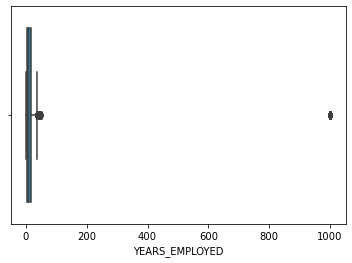

'Most of the Values are within the normal ranges, but it seems like someone has been employed for 1000 Years which, \nseems farfetched and hence is an outlier, We can get rid of this value, as It skews are analysis.'

In [58]:
#4) YEARS_EMPLOYED Boxplot 

sns.boxplot(newapp.YEARS_EMPLOYED)
plt.show()

'''Most of the Values are within the normal ranges, but it seems like someone has been employed for 1000 Years which, 
seems farfetched and hence is an outlier, We can get rid of this value, as It skews are analysis.'''

In [59]:
#Removing the Value with 1000 YEars Employement 
newapp[newapp.YEARS_EMPLOYED >100].YEARS_EMPLOYED

#This is impossible. Dropping these Rows. Or We can exclude them from our Analysis. 

8         1000.665753
11        1000.665753
23        1000.665753
38        1000.665753
43        1000.665753
             ...     
307469    1000.665753
307483    1000.665753
307487    1000.665753
307505    1000.665753
307507    1000.665753
Name: YEARS_EMPLOYED, Length: 55374, dtype: float64

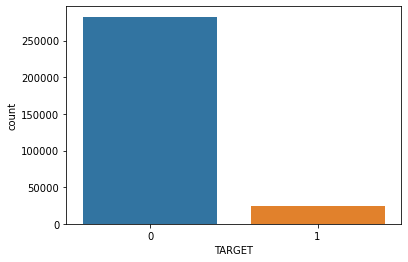

In [60]:
#DATA IMBALANCE CHECK 
sns.countplot(newapp.TARGET)
plt.show()

In [61]:
newapp.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [62]:
newapp.drop(columns = ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'], inplace = True)

In [63]:
newapp.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle


## Step 2: Let us segment the Dataset based on the TARGET 1, 0 and Then Perform Analysis on both of them together. 

In [64]:
#Splitting the Data set into 
#newapp0 :- Clients with No Difficulties
#newapp1 :- Client with Difficulties. 


newapp0 = newapp[newapp.TARGET == 0]
newapp.head()
newapp0.shape

(282686, 43)

In [65]:
newapp1 = newapp[newapp.TARGET == 1]
newapp1.head()
newapp.shape

(307511, 43)

In [66]:
DATA_IMBALANCE_RATIO = newapp0.shape[0]/newapp1.shape[0]
DATA_IMBALANCE_RATIO

11.387150050352467

In [67]:
'''THE DATA IS HIGHLY IMBALANCED. THE RATIO IS 11.38/1. 
Basically for every 1(Target) we get we have 11 (0 Target)'''

'THE DATA IS HIGHLY IMBALANCED. THE RATIO IS 11.38/1. \nBasically for every 1(Target) we get we have 11 (0 Target)'

### We need to find the top Correlations also. So we will do that separately using HEATMAPS

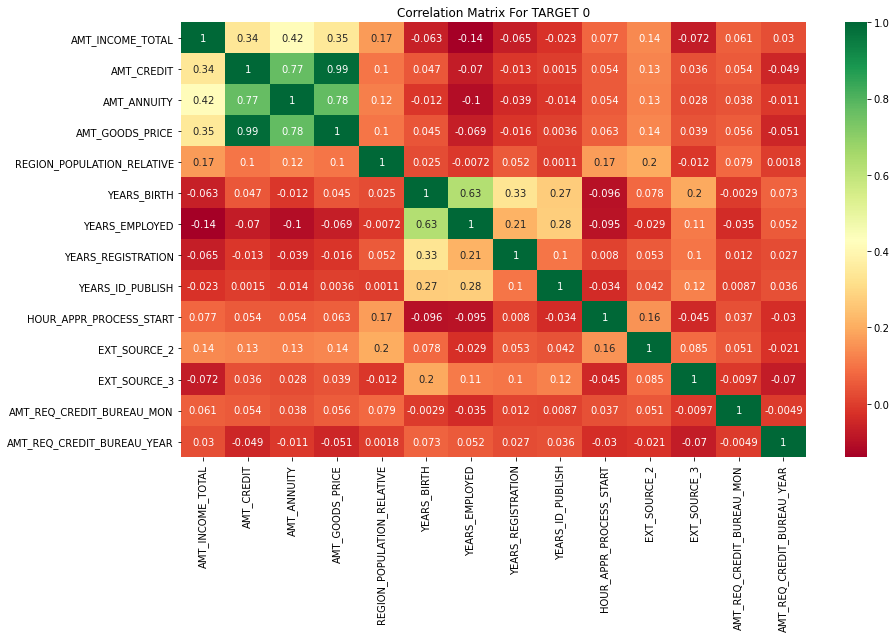

In [68]:
#FOR newapp0 TARGET VARIABLE 0 
plt.figure(figsize = [14,8])
sns.heatmap(newapp0.corr(),annot = True, cmap = 'RdYlGn')
plt.title('Correlation Matrix For TARGET 0')
plt.show()

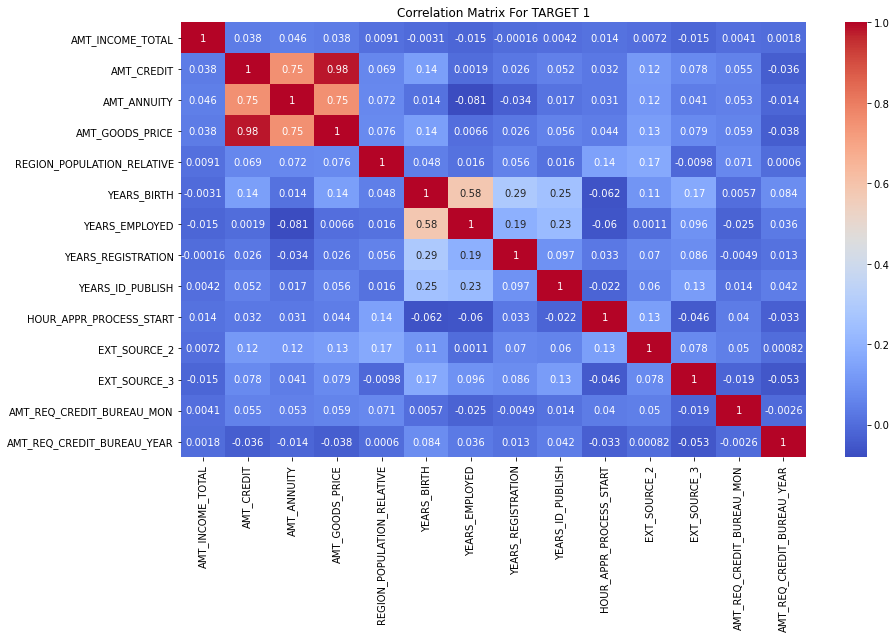

In [69]:
#FOR newapp0 TARGET VARIABLE 1
plt.figure(figsize = [14,8])
sns.heatmap(newapp1.corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix For TARGET 1')
plt.show()

#### WE CAN SEE SIMILAR SORT OF CORRELATIONS NOW< LET's FIND THE TOP 10 CORRELATIONS FOR BOTH THE DATAFRAMES

In [70]:
# TOP 10 CORR for TARGET 0 
corr0 = newapp0.corr()
correlate0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool))
correlate0 = correlate0.unstack().reset_index().dropna(subset = [0])
correlate0.columns =['VARX','VARY','Corr']
correlate0['Corr_abs'] = abs(correlate0['Corr'])
correlate0 = correlate0.sort_values(by = 'Corr_abs',ascending = False) 
correlate0.head(10)

,VARX,VARY,Corr,Corr_abs
43,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
44,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
29,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
89,YEARS_EMPLOYED,YEARS_BIRTH,0.626114,0.626114
28,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
42,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
14,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
103,YEARS_REGISTRATION,YEARS_BIRTH,0.333151,0.333151
118,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.276663,0.276663
117,YEARS_ID_PUBLISH,YEARS_BIRTH,0.271314,0.271314


In [71]:
# TOP 10 CORR for TARGET 1 
corr1 = newapp1.corr()
correlate1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool))
correlate1 = correlate1.unstack().reset_index().dropna(subset = [0])
correlate1.columns =['VARX','VARY','Corr']
correlate1['Corr_abs'] = abs(correlate1['Corr'])
correlate1 = correlate1.sort_values(by = 'Corr_abs',ascending = False) 
correlate1.head(10)

,VARX,VARY,Corr,Corr_abs
43,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
44,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
29,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
89,YEARS_EMPLOYED,YEARS_BIRTH,0.582185,0.582185
103,YEARS_REGISTRATION,YEARS_BIRTH,0.289114,0.289114
117,YEARS_ID_PUBLISH,YEARS_BIRTH,0.252863,0.252863
118,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.229090,0.229090
104,YEARS_REGISTRATION,YEARS_EMPLOYED,0.192455,0.192455
159,EXT_SOURCE_3,YEARS_BIRTH,0.171621,0.171621
144,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.169751,0.169751


### For both newapp0 and newapp1 The Top Correlations are almost the same. 

#### Now Let's Start with UNIVARIATE ANALYSIS

#### 1) For Numerical Variables

In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [73]:
#Let's Create a Function For This 
def uninumbox(X):
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize = [12,8])
    
    plt.subplot(1,2,1)
    ax = sns.boxplot(x = X, data = newapp0)
    plt.title('Customer with No Difficulties')
    
    plt.subplot(1,2,2)
    ax = sns.boxplot(x = X, data = newapp1)
    plt.title('Customer with Difficulties')
    
    plt.show()

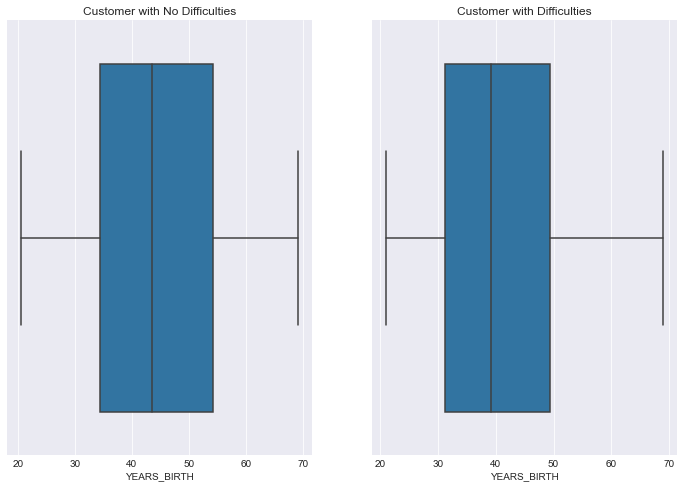

'INFERENCE : Customers between the Age of 34-55 have No difficulty in paying the dues, whereas the customers within in the\nage group of 31- 49 Have Difficulties paying.'

In [74]:
#YEARS_BIRTH
uninumbox('YEARS_BIRTH')
'''INFERENCE : Customers between the Age of 34-55 have No difficulty in paying the dues, whereas the customers within in the
age group of 31- 49 Have Difficulties paying.'''

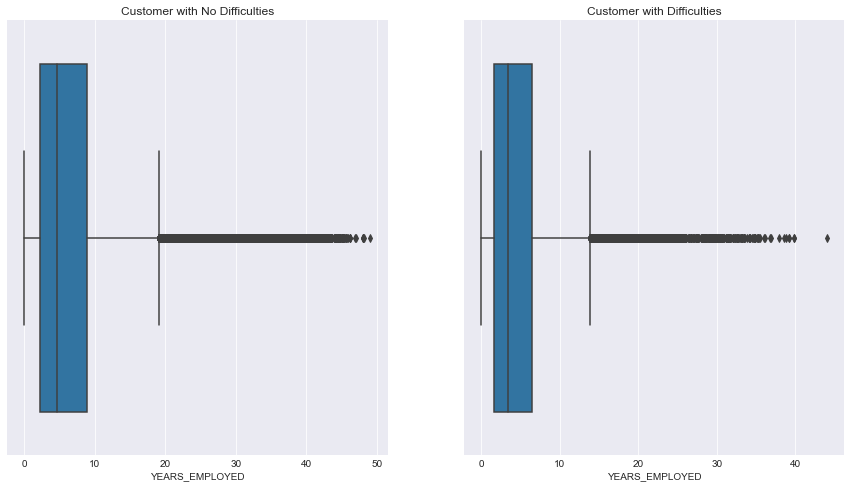

' INFERENCE: There is not much difference, As the Variable Seems Continuous, The Customer with difficulties have slightly lower years\nof employement'

In [75]:
# FOR EMPLOYEMENT DURATION I WILL HAVE TO CHECK FOR <1000 Entries Hence I cannot Use the New Function 
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [15,8])
    
plt.subplot(1,2,1)
ax = sns.boxplot(newapp0[newapp0['YEARS_EMPLOYED'] < 1000]['YEARS_EMPLOYED'])
plt.title('Customer with No Difficulties')
    
plt.subplot(1,2,2)
ax = sns.boxplot(newapp1[newapp1['YEARS_EMPLOYED'] < 1000]['YEARS_EMPLOYED'])
plt.title('Customer with Difficulties')
    
plt.show()

''' INFERENCE: There is not much difference, As the Variable Seems Continuous, The Customer with difficulties have slightly lower years
of employement'''

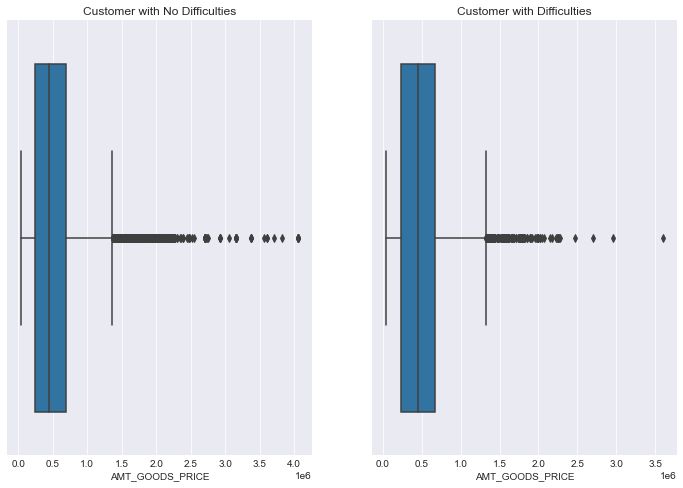

'INFERENCE: The Goods Price between 0.3 to 0.7 is same for both the Cases and the Mid Point is also very close to each other. \nSo No such trend can be seen. '

In [76]:
uninumbox('AMT_GOODS_PRICE')
'''INFERENCE: The Goods Price between 0.3 to 0.7 is same for both the Cases and the Mid Point is also very close to each other. 
So No such trend can be seen. '''

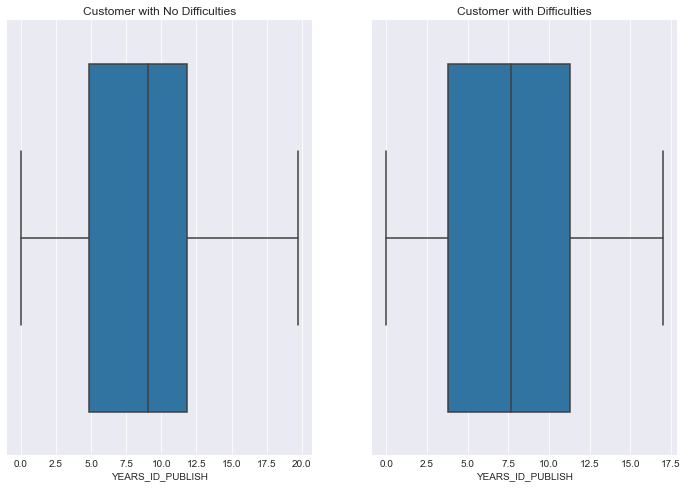

'INFERENCE: The Customer with Difficulties lies between 3.5 to 11, whereas Customers with No difficulties lies between the \n5-12 years'

In [77]:
uninumbox('YEARS_ID_PUBLISH')
'''INFERENCE: The Customer with Difficulties lies between 3.5 to 11, whereas Customers with No difficulties lies between the 
5-12 years'''

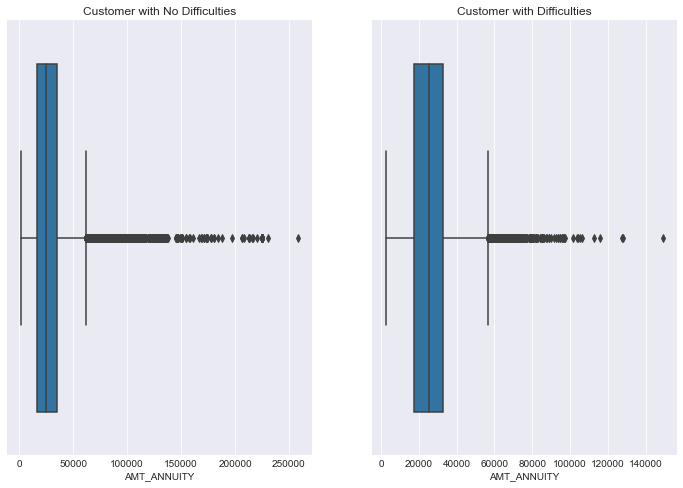

In [78]:
uninumbox('AMT_ANNUITY')

#### 2) Univariate CATEGORICAL 


In [79]:
#lets create a function for Categorical Univariate
def unicagplot(X):
    plt.style.use('ggplot')
    plt.figure(figsize=[15,5])
    
    plt.subplot(1,2,1)
    ax = sns.countplot(x = X, data = newapp0)
    plt.title('Customer With No Difficulties')
    plt.xticks(rotation = 80)
    
    plt.subplot(1,2,2)
    ax = sns.countplot(x=X, data = newapp1)
    plt.title('Customer With Difficulties')
    plt.xticks(rotation = 80)
    plt.show()
    

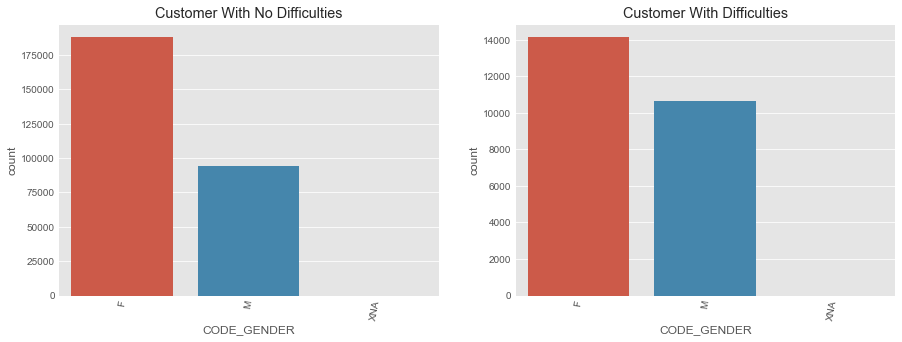

'INFERENCE: In both the Cases the Females had the highest numbers, whether with/without difficulties.\nWhereas males have a high number in Customers with Difficulties. '

In [80]:
#CODE_GENDER
unicagplot('CODE_GENDER')

'''INFERENCE: In both the Cases the Females had the highest numbers, whether with/without difficulties.
Whereas males have a high number in Customers with Difficulties. '''

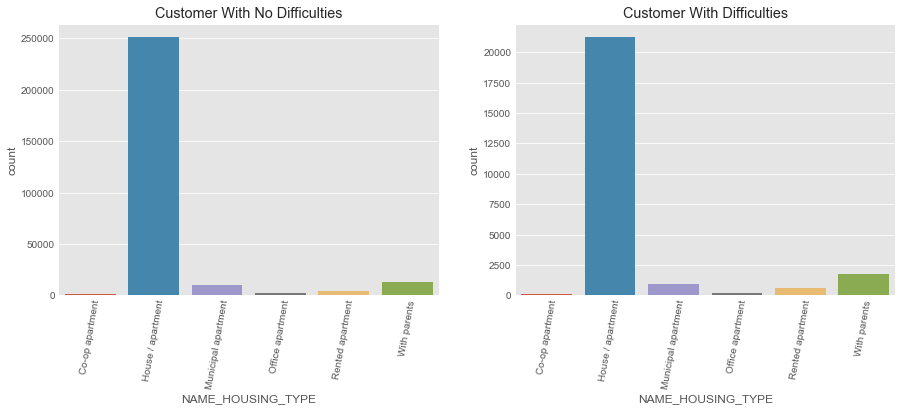

'Both the Cases the highest numbers are from House/Apartment Owners. '

In [81]:
unicagplot('NAME_HOUSING_TYPE')
'''Both the Cases the highest numbers are from House/Apartment Owners. '''

In [82]:
def unicagplot1(X):
    plt.style.use('ggplot')
    plt.figure(figsize=[15,5])
    
    plt.subplot(1,2,1)
    ax = sns.countplot(x = X, data = newapp0, hue = 'CODE_GENDER')
    plt.title('Customer With No Difficulties')
    plt.xticks(rotation = 80)
    
    plt.subplot(1,2,2)
    ax = sns.countplot(x=X, data = newapp1, hue = 'CODE_GENDER')
    plt.title('Customer With Difficulties')
    plt.xticks(rotation = 80)
    plt.show()
    

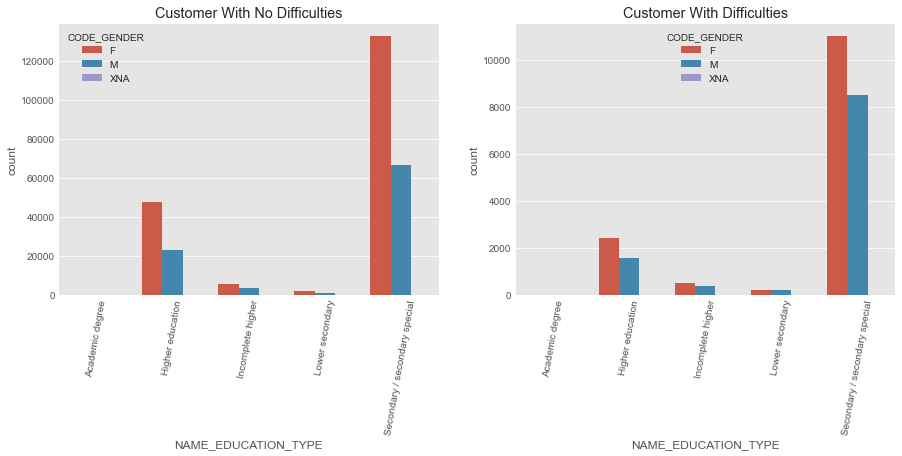

'INFERENCE: Both the Types of Customers belong to the Category of Secondary/Secondary Special\nThe Lower Secondary have the lowest numbers, which might also mean they apply for the loan the least. \nThe Customer With Higher Education are also Present in both Scenarios.'

In [83]:
unicagplot1('NAME_EDUCATION_TYPE')
'''INFERENCE: Both the Types of Customers belong to the Category of Secondary/Secondary Special
The Lower Secondary have the lowest numbers, which might also mean they apply for the loan the least. 
The Customer With Higher Education are also Present in both Scenarios.'''

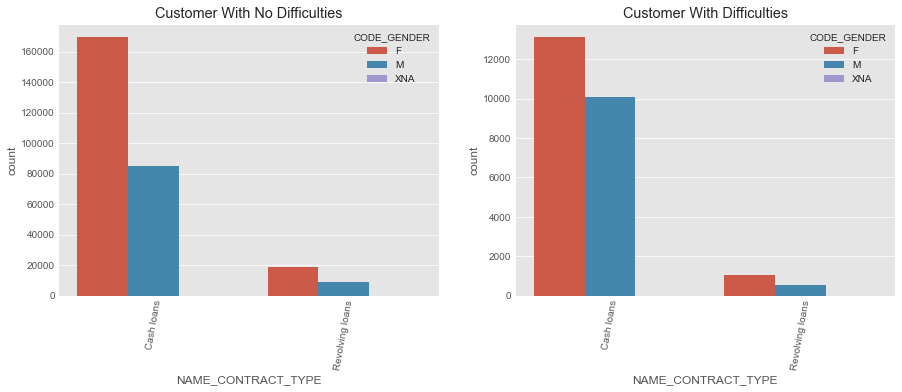

'Both Sort of Customers are high in number for Cash Loans.'

In [84]:
unicagplot1('NAME_CONTRACT_TYPE')

'''Both Sort of Customers are high in number for Cash Loans.'''

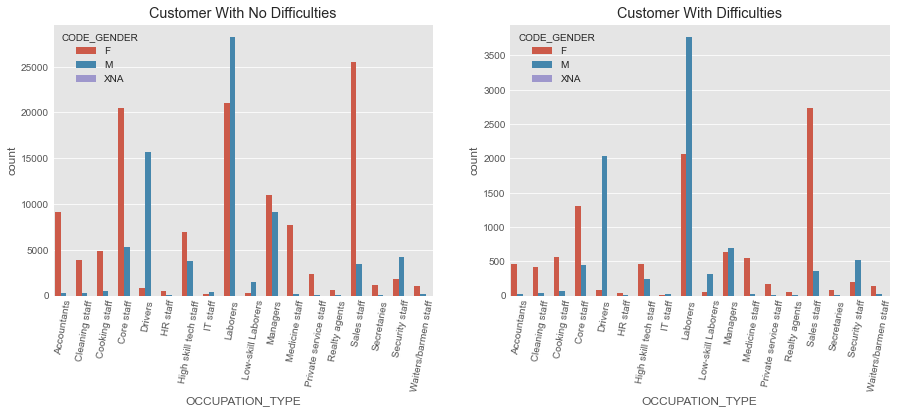

'Laborers are the Highest in both the Cases. But if we look at the Values, the Customer With Difficulties is Higher in Laborer.'

In [85]:
unicagplot1('OCCUPATION_TYPE')
'''Laborers are the Highest in both the Cases. But if we look at the Values, the Customer With Difficulties is Higher in Laborer.'''

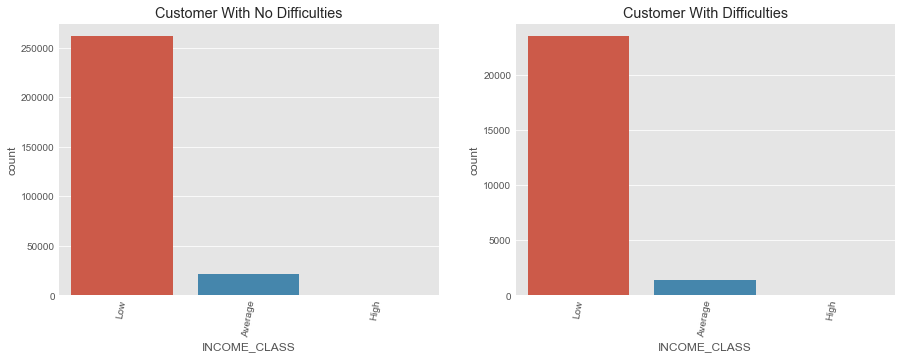

In [86]:
#INCOME_CLASS
unicagplot('INCOME_CLASS')

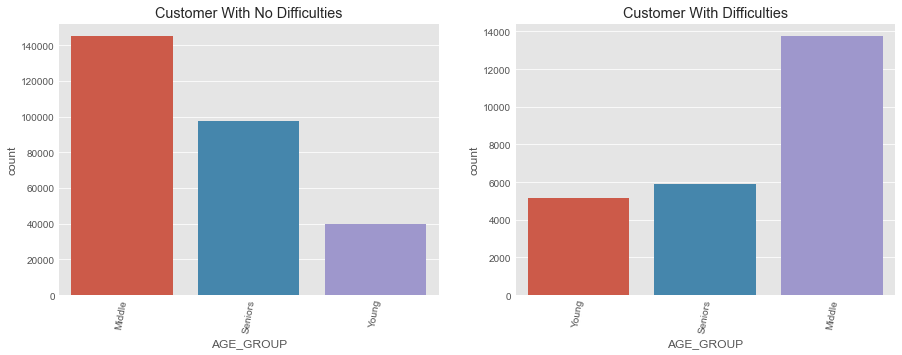

In [87]:
unicagplot('AGE_GROUP')

#### 3.) BIVARIATE ANALYSIS 
#### NUMERIC-NUMERIC 

In [88]:
#function for BIVARIATE-SCATTER PLOTS: 
def biscatnum(X,Y):
    plt.style.use('bmh')
    plt.figure(figsize = [10,5])
    
    plt.subplot(1,2,1)
    ax = sns.scatterplot(data = newapp0, x=X, y=Y)
    plt.title('Customer With No Difficulties')
    
    plt.subplot(1,2,2)
    ax = sns.scatterplot(data = newapp1, x=X, y=Y)
    plt.title('Customer Without Difficulties')
    
    plt.show()

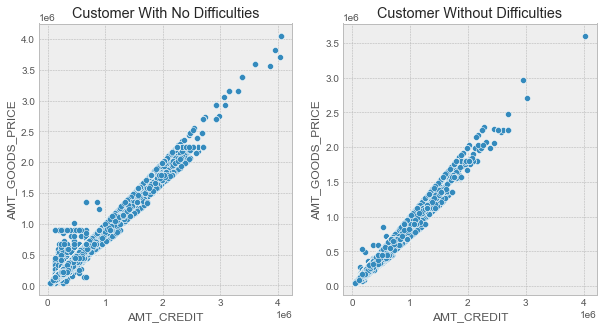

'We can see Clearly that In Both the Cases there is a Strong Correlation between AMT_CREDIT and AMT_GOODS_PRICE.\nWhich is anticipated. '

In [89]:
# AMT_GOODS_PRICE vs AMT_CREDIT
biscatnum('AMT_CREDIT', 'AMT_GOODS_PRICE')

'''We can see Clearly that In Both the Cases there is a Strong Correlation between AMT_CREDIT and AMT_GOODS_PRICE.
Which is anticipated. '''

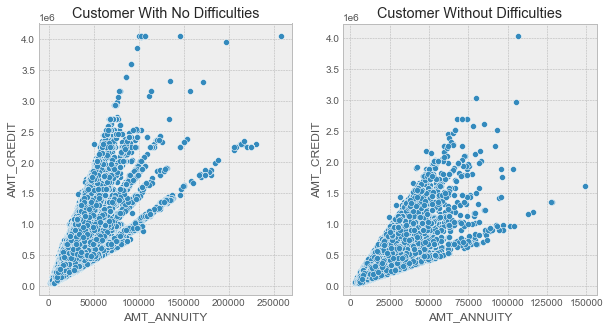

'Customers with no Difficulties have Higher Credit for Lower Annuity, which is coherent with the concept of Lending. '

In [90]:
#AMT_ANNUITY vs AMT_CREDIT 
biscatnum('AMT_ANNUITY','AMT_CREDIT')

'''Customers with no Difficulties have Higher Credit for Lower Annuity, which is coherent with the concept of Lending. '''

#### BI-VARIATE NUMERICAL-CATEGORICAL 


In [91]:
#For Bi-variate Numerical I will create a function to plot a Box Plot, Where X-Axis will be Categorical and Y-Axis will be Numerical
def biboxcn(cat, num):
    plt.style.use('ggplot')
    plt.figure(figsize=[15,8])
    
    plt.subplot(1,2,1)
    ax = sns.boxplot(x = cat, y = num, data = newapp0)
    plt.title('Customes With No Difficulties')
    plt.xticks(rotation = 90)
    
    plt.subplot(1,2,2)
    ax = sns.boxplot(x = cat, y = num, data = newapp1)
    plt.title('Customers With Difficulties')
    plt.xticks(rotation = 90)
    
    plt.show()

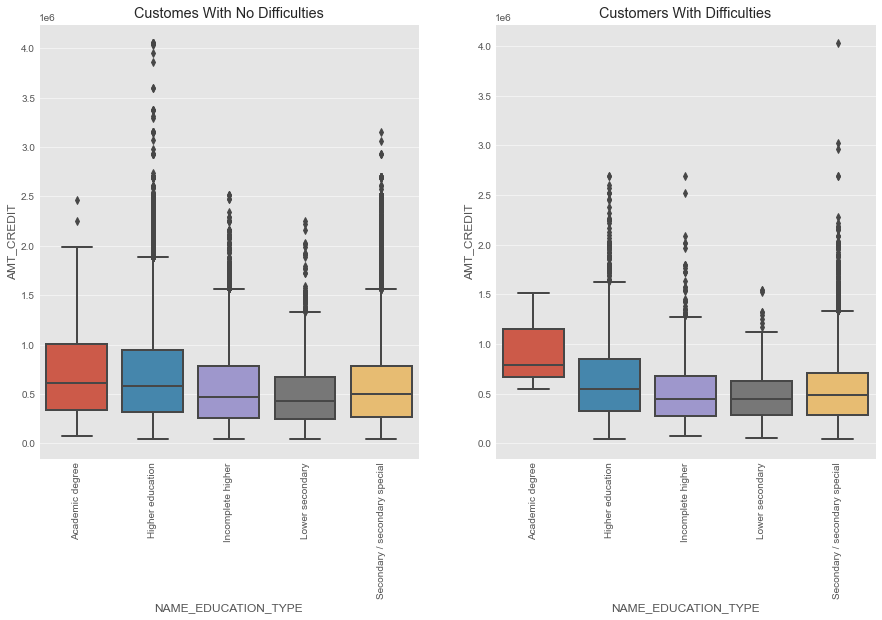

'The Majority Range is higher for People with HIGHER EDUCATION in customers with no difficulties, Other\nare more or less equally, also, people with Higher Education seem to be getting Higher Credit as well. '

In [92]:
#Study the Relation between the Education and AMT_CREDIT 
biboxcn('NAME_EDUCATION_TYPE', 'AMT_CREDIT')

'''The Majority Range is higher for People with HIGHER EDUCATION in customers with no difficulties, Other
are more or less equally, also, people with Higher Education seem to be getting Higher Credit as well. '''

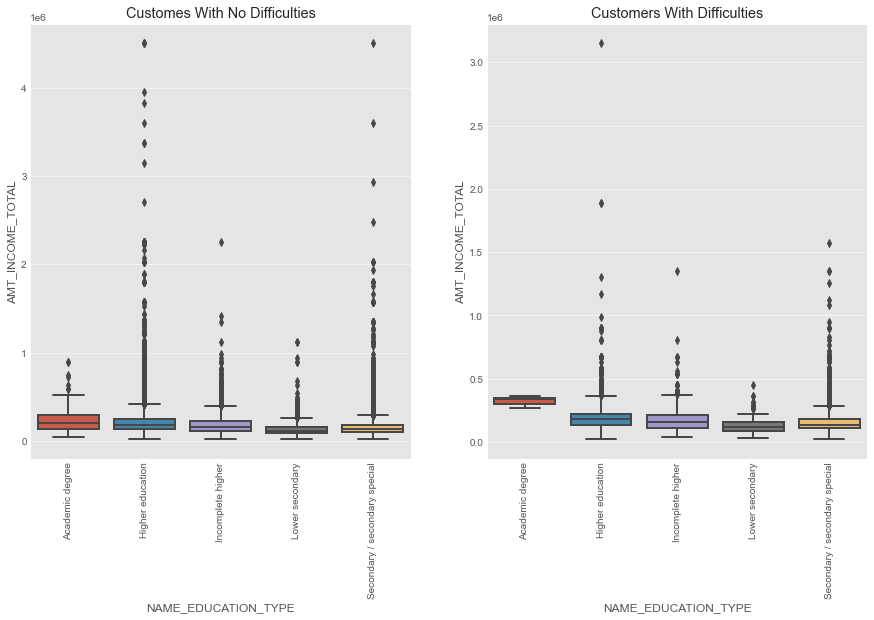

'Here the Customers without problems are showing a higher trend of income and the Highest Among Secondary and Higher Education'

In [93]:
# Study the Relation between the Income and Education (Let's see if it is coherent or not)
#Due to Outlier I will cannot use the designed function 
#So Will manually Plot. 

plt.style.use('ggplot')
plt.figure(figsize=[15,8])
    
plt.subplot(1,2,1)
ax = sns.boxplot(data = newapp0[newapp0.AMT_INCOME_TOTAL < 5000000], y ='AMT_INCOME_TOTAL', x = 'NAME_EDUCATION_TYPE')
plt.title('Customes With No Difficulties')
plt.xticks(rotation = 90)
    
plt.subplot(1,2,2)
ax = sns.boxplot(data = newapp1[newapp1.AMT_INCOME_TOTAL < 5000000],y = 'AMT_INCOME_TOTAL', x = 'NAME_EDUCATION_TYPE')
plt.title('Customers With Difficulties')
plt.xticks(rotation = 90)
    
plt.show()

'''Here the Customers without problems are showing a higher trend of income and the Highest Among Secondary and Higher Education'''


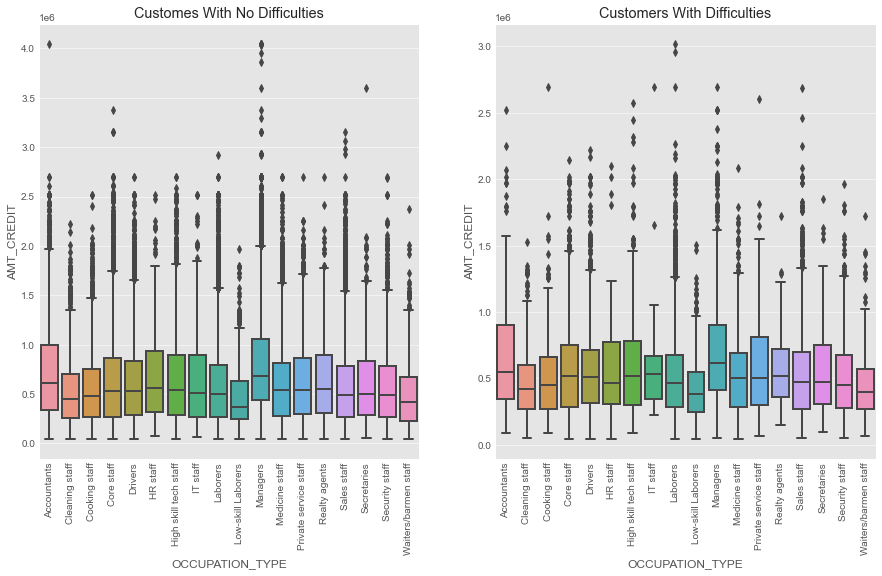

'Customers without payment difficulties seem to have a higher Credit Range, than the customers with payment difficulties, Whereas managers seem to be drawing upper side of Credit'

In [94]:
#Let's Study the Relationship between Occupation Type and CREDIT
biboxcn('OCCUPATION_TYPE','AMT_CREDIT')

'''Customers without payment difficulties seem to have a higher Credit Range, than the customers with payment difficulties, Whereas managers seem to be drawing upper side of Credit'''

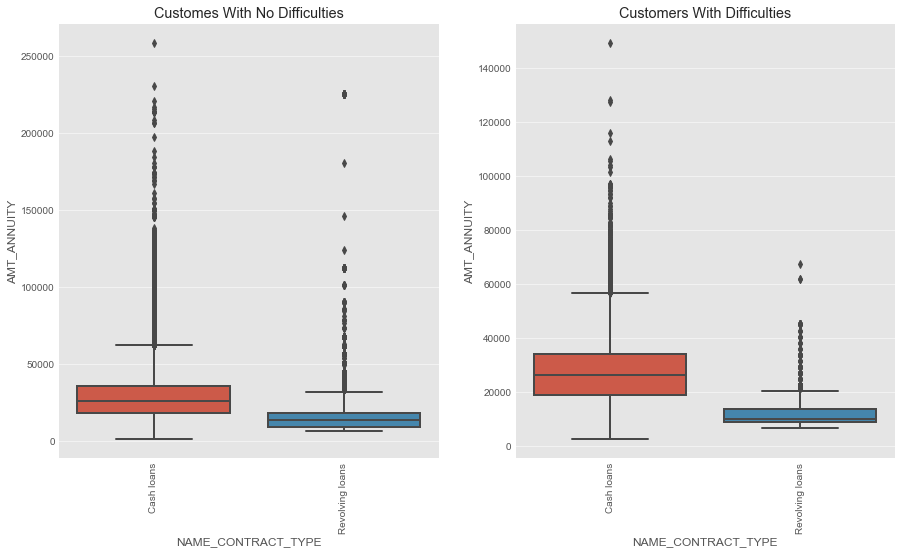

'Cash Loans seem to be drawing higher Annuity than revolving loans, where as the Customer without Difficulties, seem to be paying the Higher Annuity also as compare to customers with difficulties'

In [95]:
#Let's Study NAME_CONTRACT_TYPE and AMT_ANNUITY 
biboxcn('NAME_CONTRACT_TYPE','AMT_ANNUITY')

'''Cash Loans seem to be drawing higher Annuity than revolving loans, where as the Customer without Difficulties, seem to be paying the Higher Annuity also as compare to customers with difficulties'''

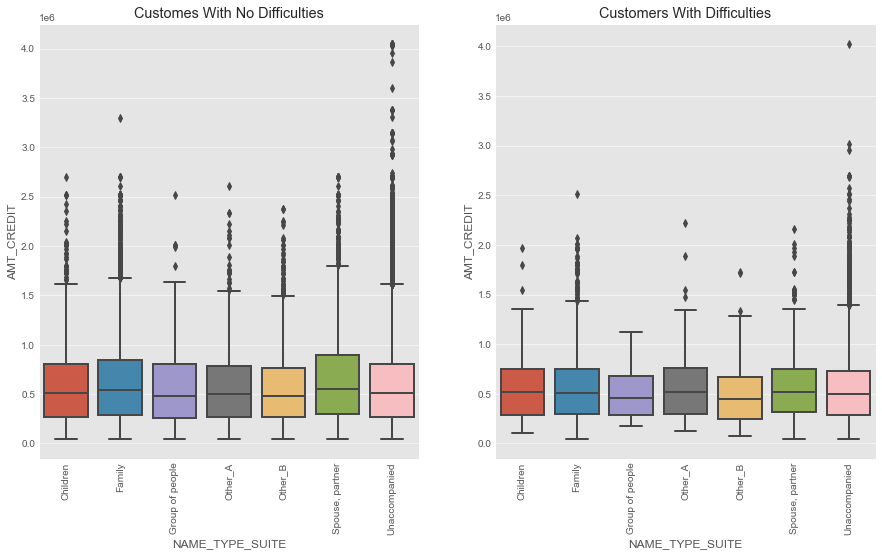

'No Marked Difference, Seems in similar range. '

In [96]:
# NAME_TYPE_SUITE vs AMT_CREDIT

biboxcn('NAME_TYPE_SUITE','AMT_CREDIT')

'''No Marked Difference, Seems in similar range. '''

### Let's Start with the Previous Application Data Set

In [97]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
prevapp.shape

(1670214, 37)

In [99]:
prevapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### There seem to be some very high number of Missing values, doing a quick check and Dropping Columns if More than 50% 


In [100]:
(prevapp.isnull().mean()*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [101]:
prevapp = prevapp.loc[:,prevapp.isnull().mean() <= .5]
prevapp.shape

(1670214, 33)

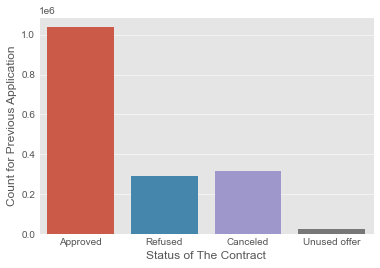

In [102]:
#Dropped the Columns, Now let's Start analysing the Variables
#NAME_CONTRACT_STATUS

sns.countplot(prevapp.NAME_CONTRACT_STATUS)
plt.xlabel('Status of The Contract')
plt.ylabel('Count for Previous Application')
plt.show()

## Will MERGE the TWO data sets, on SK_ID_CURR, we will want to do a INNER JOIN on the DATA sets. 

In [103]:
#Creating a MASTERAPP - Master Application 

masterapp = pd.merge(left = newapp, right = prevapp, how = 'inner', on = 'SK_ID_CURR', suffixes ='_P') #Suffix P to Signify Data from Previous


In [104]:
masterapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEP,AMT_ANNUITYP,AMT_APPLICATION,AMT_CREDITP,AMT_GOODS_PRICEP,WEEKDAY_APPR_PROCESS_STARTP,HOUR_APPR_PROCESS_STARTP,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEP,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Seniors,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unacco

In [105]:
masterapp.shape

#Everything looks Okay! 


(1413701, 75)

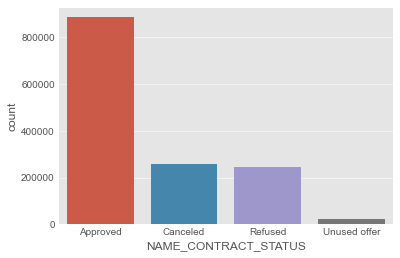

In [106]:
#Checking the Distribution Again 
sns.countplot(masterapp.NAME_CONTRACT_STATUS)
plt.show()

### Now, the question is how to approach the Analysis, We can either Seperate the Data on the basis on NAME_CONTRACT_STATUS and Then do multiple plots for all the Variables, OR we start plotting single variable and then add the contract status. That will make the task cumbersome and lengthy, How about we split the Data SET and then Create a FUNCTION like earlier to make our life easier. And this way we can identify all the Variables that impact the Target Variable. 

In [107]:
#Splitting the Data into approvedapp, refusedapp, cancelledapp, unusedapp

In [108]:
approvedapp = masterapp[masterapp.NAME_CONTRACT_STATUS == 'Approved']
refusedapp = masterapp[masterapp.NAME_CONTRACT_STATUS == 'Refused']
cancelledapp = masterapp[masterapp.NAME_CONTRACT_STATUS == 'Canceled']
unusedapp = masterapp[masterapp.NAME_CONTRACT_STATUS == 'Unused offer']

In [109]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [110]:
def multicountplot(X): 
    plt.style.use('ggplot')
    
    
    fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows = 2, ncols = 2,figsize = [15,10], sharey = 'all')
    plt.tight_layout(pad = 12.0)
    
    ax1 = sns.countplot(ax = ax1, data = refusedapp , x = X, hue = 'TARGET')
    ax1.set_title('REFUSED')
    ax1.set_ylabel('COUNT OF LOANS')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    
    ax2 = sns.countplot(ax = ax2, data = approvedapp , x = X, hue = 'TARGET')
    ax2.set_title('APPROVED')
    ax2.set_ylabel('COUNT OF LOANS')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)

    ax3 = sns.countplot(ax = ax3, data = cancelledapp , x = X, hue = 'TARGET')
    ax3.set_title('CANCELLED')
    ax3.set_ylabel('COUNT OF LOANS')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
    
    ax4 = sns.countplot(ax = ax4, data = unusedapp , x = X, hue = 'TARGET')
    ax4.set_title('UNUSED OFFER')
    ax4.set_ylabel('COUNT OF LOANS')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)
    
   
    plt.show()

In [111]:
masterapp.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEP,AMT_ANNUITYP,AMT_APPLICATION,AMT_CREDITP,AMT_GOODS_PRICEP,WEEKDAY_APPR_PROCESS_STARTP,HOUR_APPR_PROCESS_STARTP,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEP,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0


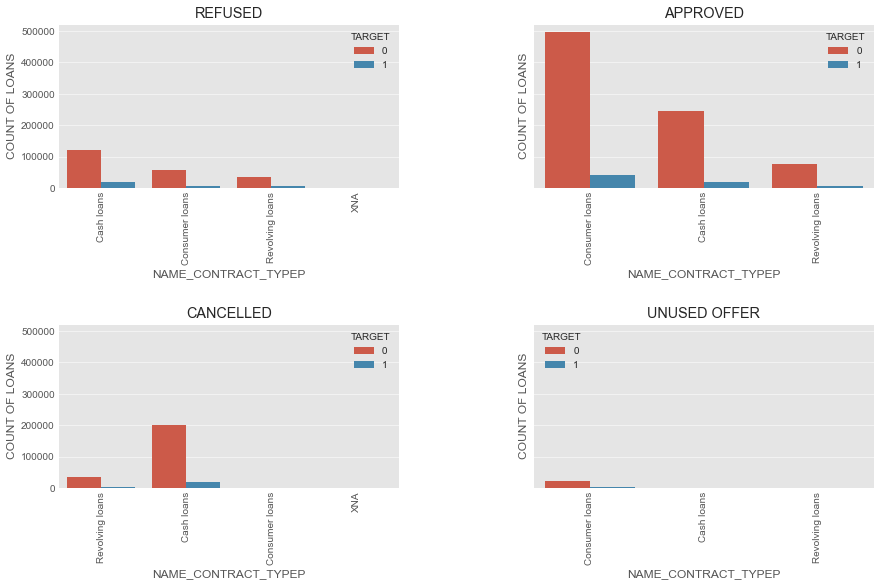

'INFERENCE 1) Clients Prefer Cash Loans and Consumer Loans Over other types. 2) People With Approved Consumer Loans have the highest Difficulty in paying the loan\n3) Cash loans have the highest Cancellation rate. As we saw earlier due to to Higher Annuity they attract.'

In [112]:
multicountplot('NAME_CONTRACT_TYPEP')
'''INFERENCE 1) Clients Prefer Cash Loans and Consumer Loans Over other types. 2) People With Approved Consumer Loans have the highest Difficulty in paying the loan
3) Cash loans have the highest Cancellation rate. As we saw earlier due to to Higher Annuity they attract.'''

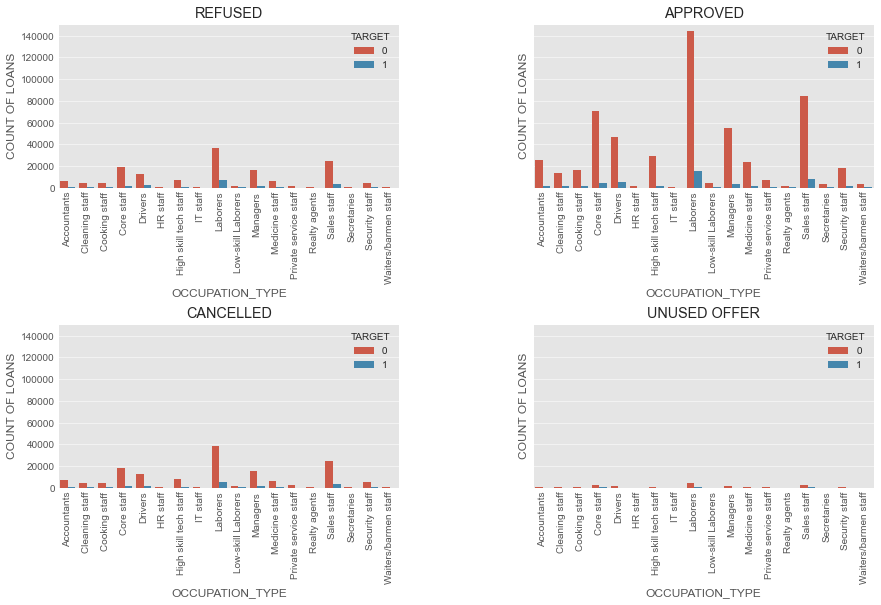

'INFERENCE 1) Laborers have the highest number of applications. Also for the Approved Loans Laborers have the Highest Number of Customers with difficulties in paying the loan.\n2) Sales Staff also have high application numbers, and this might be due to the fact that the net income is relatively low.'

In [113]:
#Compare Occupatin with the Kind of Loans 
multicountplot('OCCUPATION_TYPE')
'''INFERENCE 1) Laborers have the highest number of applications. Also for the Approved Loans Laborers have the Highest Number of Customers with difficulties in paying the loan.
2) Sales Staff also have high application numbers, and this might be due to the fact that the net income is relatively low.'''

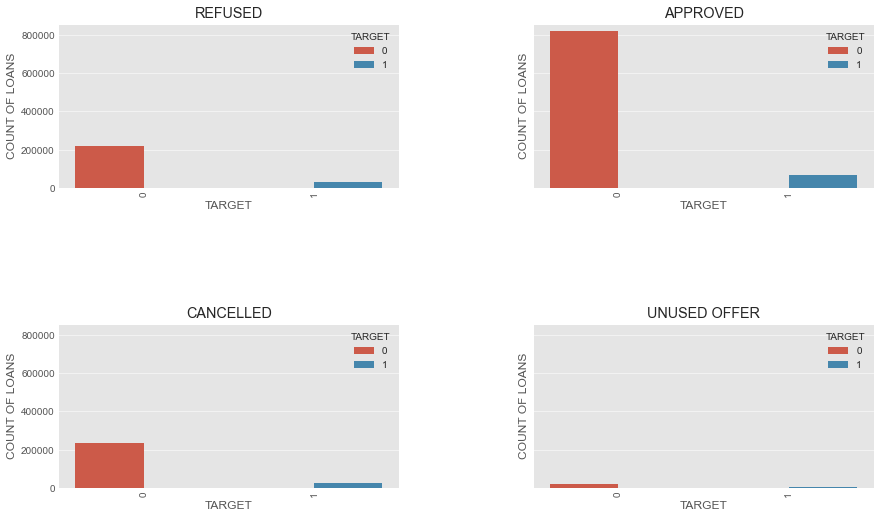

'INFERENE: It is a good indicator that bank is approving more loans for Customers without payment difficulties, But at the same time a huge number of customers without payment difficulties were Refused, This might lead to loss of Business.'

In [114]:
#TARGET

multicountplot('TARGET')
'''INFERENE: It is a good indicator that bank is approving more loans for Customers without payment difficulties, But at the same time a huge number of customers without payment difficulties were Refused, This might lead to loss of Business.'''

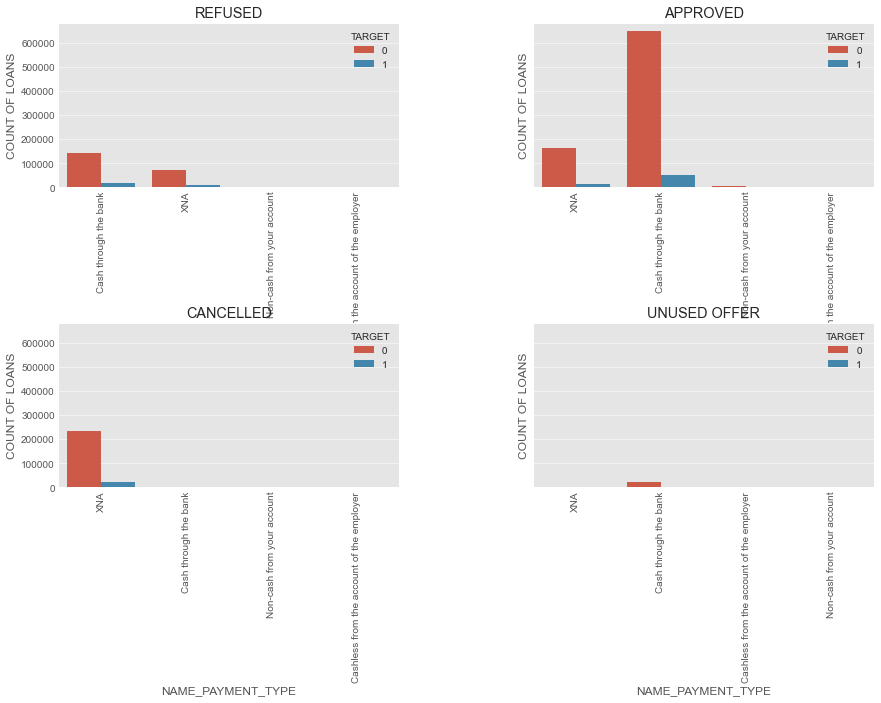

'INFERENCE: 1) Cash through Banks is the most sought after Payment method, when compared to other options. Banks can maybe educate clients on other ways to pay loans, hence might decrease the number of cancellations, it is a big might'

In [115]:
multicountplot('NAME_PAYMENT_TYPE')
'''INFERENCE: 1) Cash through Banks is the most sought after Payment method, when compared to other options. Banks can maybe educate clients on other ways to pay loans, hence might decrease the number of cancellations, it is a big might'''

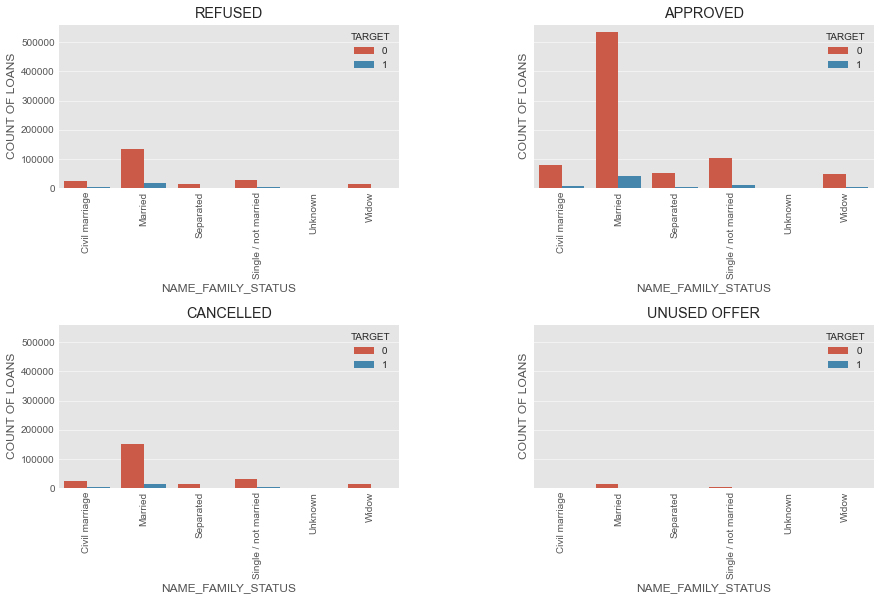

'INFERENCE: 1) Married constitutes the biggest Share among all the other categories, But Marries people who are approved have the highest number of Client With Payment difficulties.'

In [116]:
multicountplot('NAME_FAMILY_STATUS')

'''INFERENCE: 1) Married constitutes the biggest Share among all the other categories, But Marries people who are approved have the highest number of Client With Payment difficulties.'''

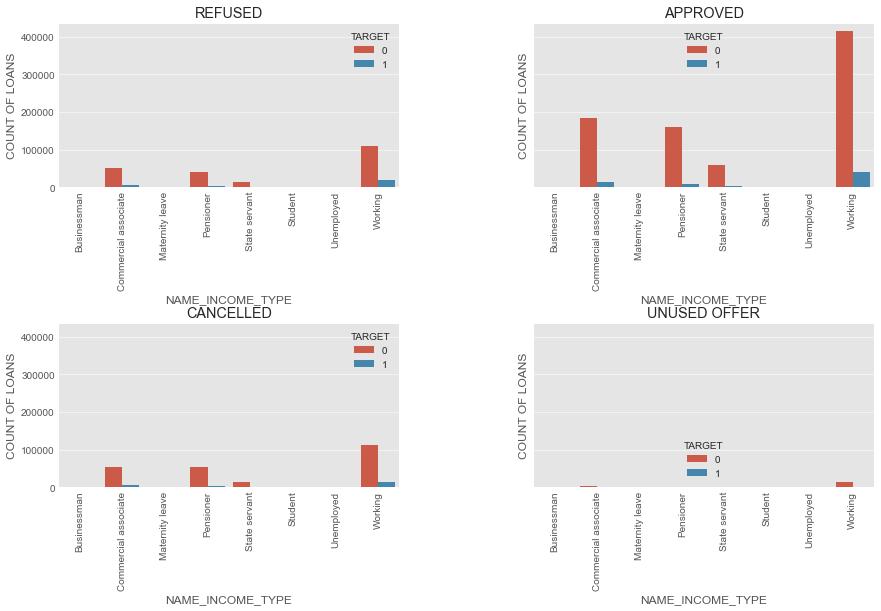

'INFERENCE: Working Professionals have the highest number of Applications, along with Highest Number of Clients With Payment Difficulties. Hence More Focus should be put on other professionals. \n2) The Working professionals who did not have any difficulties paying the loan were also refused, Hence leading to Loss of Business. '

In [117]:
#INCOME WILL PLAY A BIG PART IN STATUS
multicountplot('NAME_INCOME_TYPE')

'''INFERENCE: Working Professionals have the highest number of Applications, along with Highest Number of Clients With Payment Difficulties. Hence More Focus should be put on other professionals. 
2) The Working professionals who did not have any difficulties paying the loan were also refused, Hence leading to Loss of Business. '''

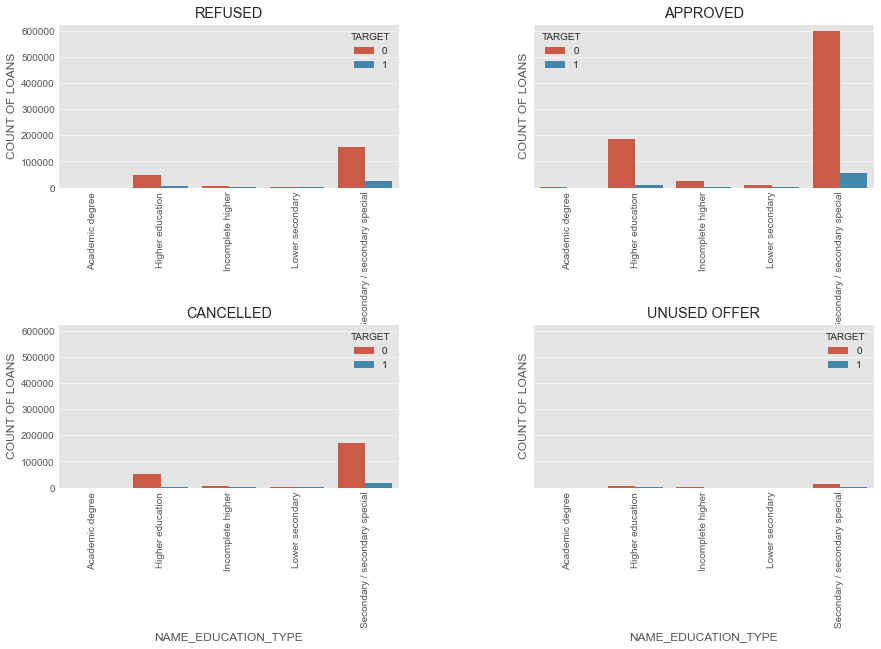

'INFERENCE: 1) Secondary have the highest number of Appications, and for the Approved loans the Maximum number of Clients with Difficulties. \n2) Higher Education Category has a low number of Clients with Difficulties, and a high refusal rate for Clients without Difficulties, Maybe focusing on this category will help bring more business.'

In [118]:
multicountplot('NAME_EDUCATION_TYPE')

'''INFERENCE: 1) Secondary have the highest number of Appications, and for the Approved loans the Maximum number of Clients with Difficulties. 
2) Higher Education Category has a low number of Clients with Difficulties, and a high refusal rate for Clients without Difficulties, Maybe focusing on this category will help bring more business.'''

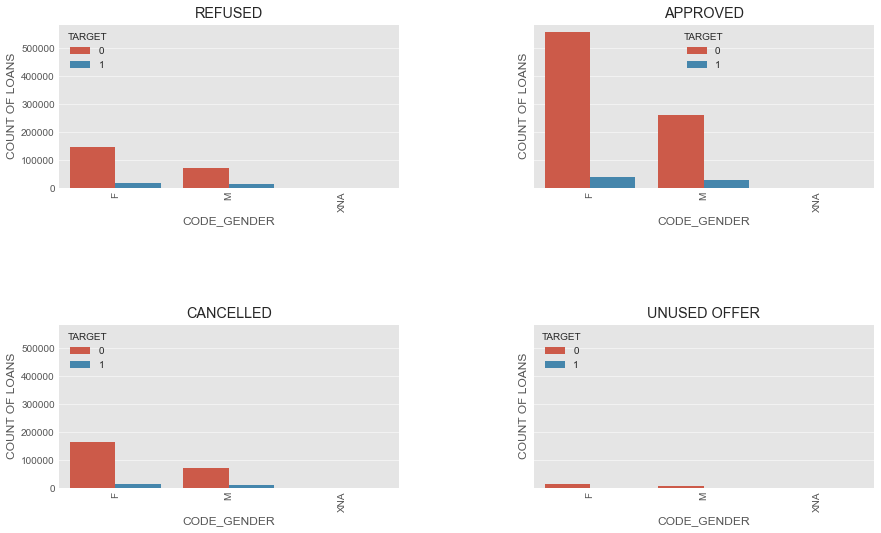

' INFERENCE: 1) Females have the dominant share of applications, and have the highest number of Clients without difficulties in all the cases.\n2) Males on the other hand lend less and have almost the same number of Clients as Females with PAYMENT DIFFICULTIES.'

In [119]:
#CODE GENDER 
multicountplot('CODE_GENDER')

''' INFERENCE: 1) Females have the dominant share of applications, and have the highest number of Clients without difficulties in all the cases.
2) Males on the other hand lend less and have almost the same number of Clients as Females with PAYMENT DIFFICULTIES.'''

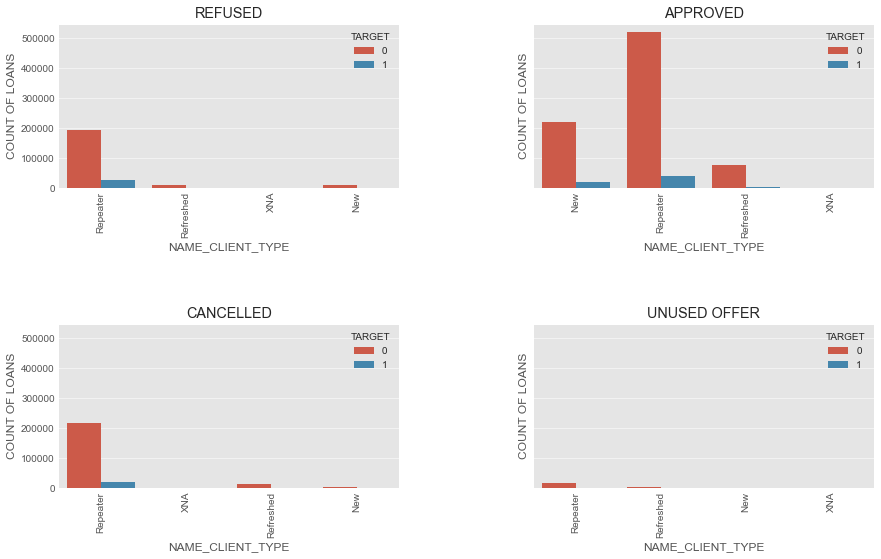

'INFERENCE: 1) It is natural that Repeater without Payment Difficulties have the highest approval numbers, but at the same time, Repeater are also defaulting at a higher rate.\n2) The Repeater with NO Payment Difficulties are being REFUSED a lot, hence losing on Business'

In [120]:
#NAME_CLIENT_TYPE 
multicountplot('NAME_CLIENT_TYPE')


'''INFERENCE: 1) It is natural that Repeater without Payment Difficulties have the highest approval numbers, but at the same time, Repeater are also defaulting at a higher rate.
2) The Repeater with NO Payment Difficulties are being REFUSED a lot, hence losing on Business'''

In [121]:
masterapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEP,AMT_ANNUITYP,AMT_APPLICATION,AMT_CREDITP,AMT_GOODS_PRICEP,WEEKDAY_APPR_PROCESS_STARTP,HOUR_APPR_PROCESS_STARTP,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEP,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Middle,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-500000,Low,Seniors,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unacco

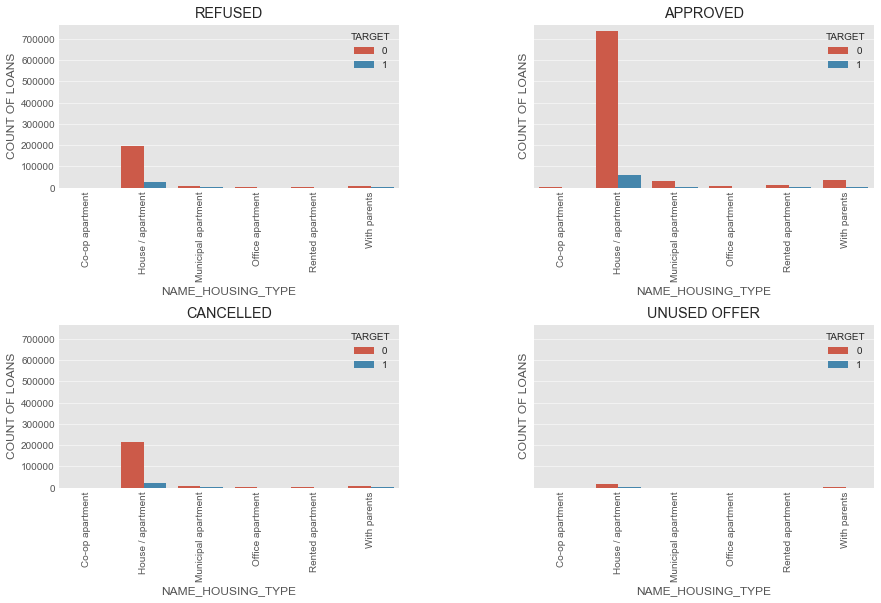

'INFERENCE: 1) Client with HOUSE/APARTMENT have the highest applications and approvals, due to the presence of Collateral, But the ones Approved, are also defaulting more than other Categories.\n2) Clients with Parents have lowest number of Payment Difficulties, and can hence develop business more. '

In [122]:
multicountplot('NAME_HOUSING_TYPE')

'''INFERENCE: 1) Client with HOUSE/APARTMENT have the highest applications and approvals, due to the presence of Collateral, But the ones Approved, are also defaulting more than other Categories.
2) Clients with Parents have lowest number of Payment Difficulties, and can hence develop business more. '''

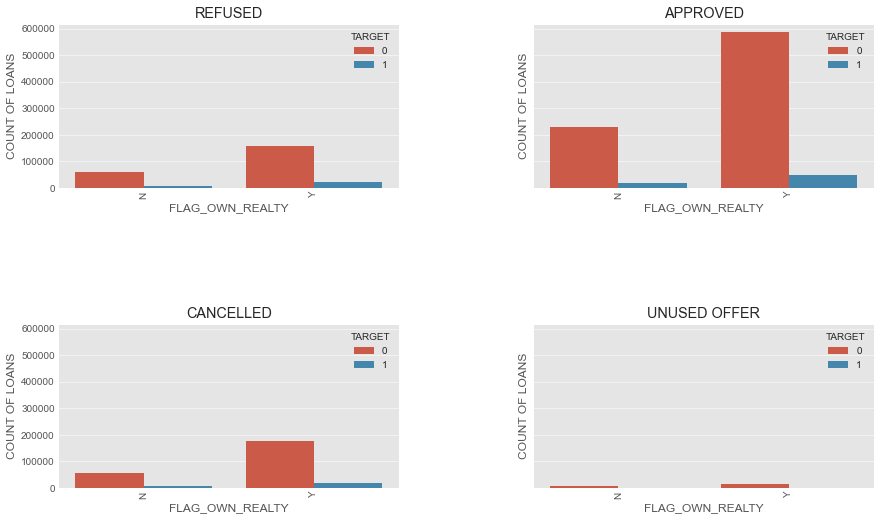

In [123]:
multicountplot('FLAG_OWN_REALTY')

In [124]:
masterapp.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,INCOME_CLASS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEP,AMT_ANNUITYP,AMT_APPLICATION,AMT_CREDITP,AMT_GOODS_PRICEP,WEEKDAY_APPR_PROCESS_STARTP,HOUR_APPR_PROCESS_STARTP,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEP,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0-500000,Low,Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0


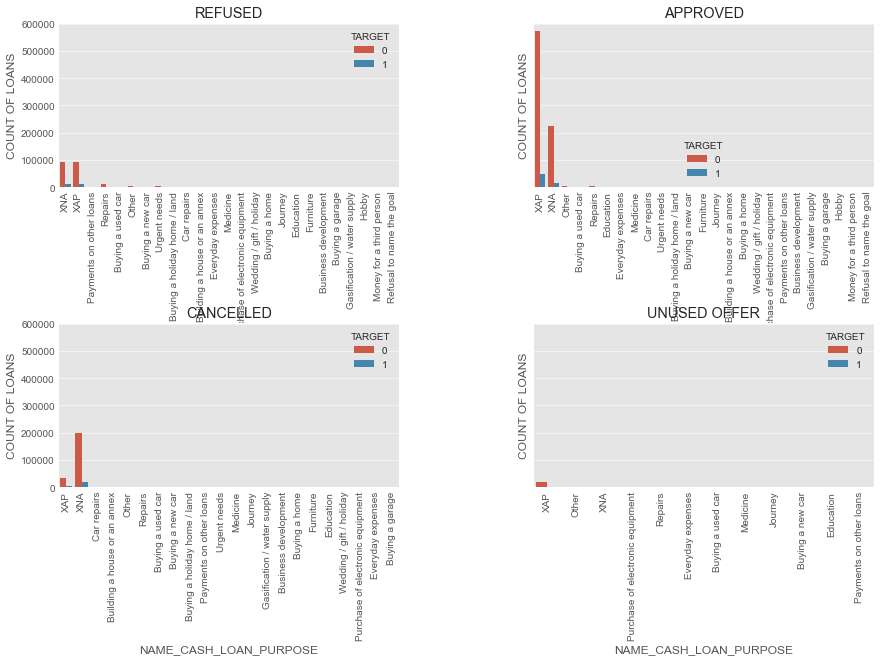

'Repair Catergory Seems to be ATTRACTING a lot of Applications after XAP and XNA.'

In [125]:
multicountplot('NAME_CASH_LOAN_PURPOSE')

'''Repair Catergory Seems to be ATTRACTING a lot of Applications after XAP and XNA.'''


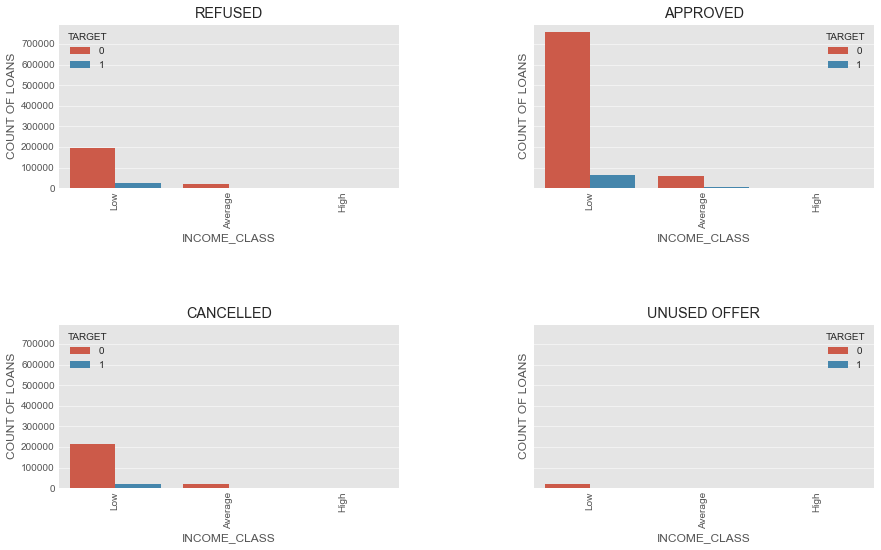

In [126]:
multicountplot('INCOME_CLASS')

In [127]:
masterapp[masterapp.INCOME_CLASS == 'High']['TARGET'].value_counts()

0    60
1     4
Name: TARGET, dtype: int64

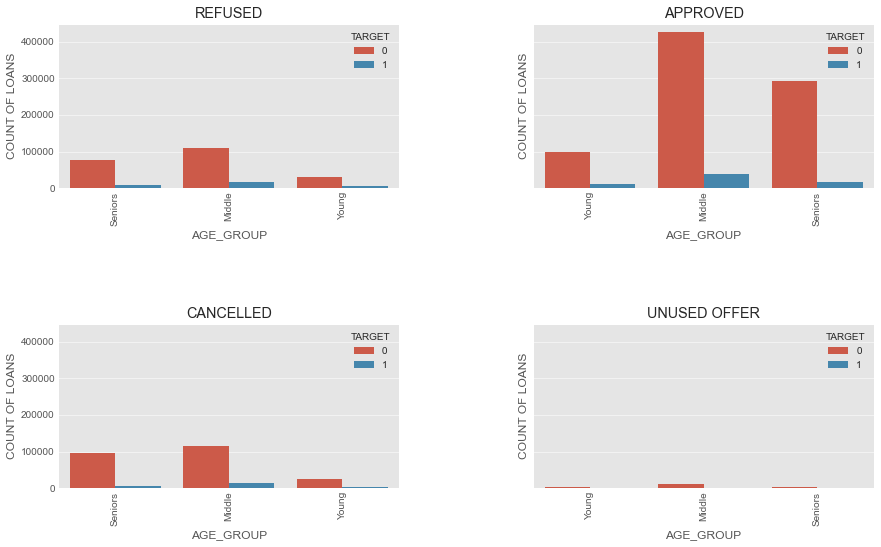

In [128]:
multicountplot('AGE_GROUP')

In [129]:
masterapp[masterapp.NAME_CASH_LOAN_PURPOSE == 'Repairs']['TARGET'].value_counts()

#There are a lot of Clients with DIFFICULTIES that are seeking Loans REPAIR and are Not able to Make Payments on Time.

0    17501
1     2616
Name: TARGET, dtype: int64

In [130]:
masterapp[masterapp.NAME_HOUSING_TYPE == 'House / apartment']['TARGET'].value_counts()

0    1158992
1     105960
Name: TARGET, dtype: int64

In [131]:
by_age = masterapp.groupby(['AGE_GROUP','TARGET']).count()

In [132]:
byage = by_age[['SK_ID_CURR']]

In [133]:
byage

#Pct of Default in 
#Young : 11.91%
#Middle: 9.42%
#Seniors : 6.47%

SK_ID_CURR
AGE_GROUP TARGET            
Middle    0           661748
          1            68833
Seniors   0           470898
          1            32055
Young     0           158695
          1            21472

## CONCLUSIONS



### Who All can be granted the Loans( Less probability of Defaulting)
##### Clients Working As State Servants 
##### Senior Citizens have low default number 
##### Females with Higher Education 
##### Refreshed Clients with unused Loan Status. 
##### Clients from High Income Group
##### Those Who did not Have any default previously. 
##### Clients living with Parents are defaulting less. 

### Who All can be Risky (High Chance of Defaulting)
##### Secondary and Secondary Special have high default numbers 
##### Working Professionals also have high Default Rates.
##### Males seek lesser number of Applications and yet have high chances of Defaulting. 
##### Those who were refused the Loan Previously, will default if Approved. 